<a href="https://colab.research.google.com/github/shinobu357/TugasMLRaisya/blob/main/Week%206/Tugas_Week_6_Raisya_Athaya_Kamilah_101032380253_K_means_dan_Hierarchical_Clustering(Clusteringdatasetweek6).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Mount Gdrive


In [15]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Importing the dataset

In [16]:
# Import library yang dibutuhkan
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.decomposition import PCA


Inisialisasi library yang dibutuhkan untuk analisis data,visualisasi, dan penerapan metode clustering

In [17]:
# Membaca file dataset
file_path = '/content/drive/MyDrive/Week 6/clusteringweek06.csv'
df = pd.read_csv(file_path)

# Melihat 5 baris pertama
df.head()


,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,...,x13,x14,x15,x16,x17,x18,x19,x20,x21,x22
0,1.0,0.152936,-0.105586,0.200722,0.317201,0.260764,0.100945,-0.150063,-0.171128,0.124676,...,-0.156436,0.082245,0.135752,-0.024017,-0.108351,-0.077623,-0.009568,0.057684,0.118680,0.014038
1,1.0,0.171534,-0.098975,0.268425,0.338672,0.268353,0.060835,-0.222475,-0.207693,0.170883,...,-0.254341,0.022786,0.163320,0.012022,-0.090974,-0.056510,-0.035303,0.020140,0.082263,0.029056
2,1.0,0.152317,-0.082973,0.287128,0.276014,0.189867,0.008714,-0.242234,-0.219153,0.232538,...,-0.237384,0.050791,0.207338,0.083536,-0.050691,-0.023590,-0.066722,-0.025083,0.099108,0.077162
3,1.0,0.224392,0.118985,0.329432,0.372088,0.361005,0.015501,-0.194347,-0.098181,0.270375,...,-0.317084,-0.011567,0.100413,-0.050224,-0.136009,-0.177037,-0.130498,-0.054766,-0.018691,0.023954
4,1.0,0.087817,-0.068345,0.306967,0.330923,0.249144,0.006884,-0.265423,-0.172700,0.266434,...,-0.298524,0.037439,0.219153,0.062837,-0.048885,-0.053074,-0.088550,-0.031346,0.108610,0.079244


Membaca dataset clusteringweek06.cs dan menampilkan 5 kolom pada dataset

# Menampilkan informasi dataset dan nilai null

In [18]:
# Melihat informasi dataset
df.info()

# Mengecek apakah ada missing values
df.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7195 entries, 0 to 7194
Data columns (total 22 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x1      7195 non-null   float64
 1   x2      7195 non-null   float64
 2   x3      7195 non-null   float64
 3   x4      7195 non-null   float64
 4   x5      7195 non-null   float64
 5   x6      7195 non-null   float64
 6   x7      7195 non-null   float64
 7   x8      7195 non-null   float64
 8   x9      7195 non-null   float64
 9   x10     7195 non-null   float64
 10  x11     7195 non-null   float64
 11  x12     7195 non-null   float64
 12  x13     7195 non-null   float64
 13  x14     7195 non-null   float64
 14  x15     7195 non-null   float64
 15  x16     7195 non-null   float64
 16  x17     7195 non-null   float64
 17  x18     7195 non-null   float64
 18  x19     7195 non-null   float64
 19  x20     7195 non-null   float64
 20  x21     7195 non-null   float64
 21  x22     7195 non-null   float64
dtype

,0
x1,0
x2,0
x3,0
x4,0
x5,0
x6,0
x7,0
x8,0
x9,0
x10,0


Menampilkan informasi tiap tipe kolom dataset dan tidak ada nilai null

# Menampilkan kolom data numerik

In [19]:
# Memilih kolom numerik yang relevan
numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns
df_numerical = df[numerical_columns]

# Mengecek data numerik yang akan digunakan
df_numerical.describe()


,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,...,x13,x14,x15,x16,x17,x18,x19,x20,x21,x22
count,7195.000000,7195.000000,7195.000000,7195.000000,7195.000000,7195.000000,7195.000000,7195.000000,7195.000000,7195.000000,...,7195.000000,7195.000000,7195.000000,7195.000000,7195.000000,7195.000000,7195.000000,7195.000000,7195.000000,7195.000000
mean,0.989885,0.323584,0.311224,0.445997,0.127046,0.097939,-0.001397,-0.000370,0.128213,0.055998,...,0.150945,-0.039244,-0.101748,0.042062,0.088680,0.007755,-0.049474,-0.053244,0.037313,0.087567
std,0.069016,0.218653,0.263527,0.160328,0.162722,0.120412,0.171404,0.116302,0.179008,0.127099,...,0.206880,0.152515,0.187618,0.119915,0.138055,0.084733,0.082546,0.094181,0.079470,0.123442
min,-0.251179,-0.673025,-0.436028,-0.472676,-0.636012,-0.410417,-0.538982,-0.576506,-0.587313,-0.952266,...,-0.644116,-0.590380,-0.717156,-0.498675,-0.421480,-0.759322,-0.680745,-0.361649,-0.430812,-0.379304
25%,1.000000,0.165945,0.138445,0.336737,0.051717,0.012581,-0.125737,-0.063109,0.004648,-0.001132,...,-0.002859,-0.132980,-0.255929,-0.019549,-0.001764,-0.042122,-0.106079,-0.120971,-0.017620,0.000533
50%,1.000000,0.302184,0.274626,0.481463,0.161361,0.072079,-0.052630,0.013265,0.189317,0.063478,...,0.196921,-0.050715,-0.143259,0.041081,0.112769,0.011820,-0.052626,-0.055180,0.031274,0.105373
75%,1.000000,0.466566,0.430695,0.559861,0.222592,0.175957,0.085580,0.075108,0.265395,0.117725,...,0.324589,0.039157,0.017348,0.107046,0.201932,0.061889,0.006321,0.001342,0.089619,0.194819
max,1.000000,1.000000,1.000000,1.000000,0.752246,0.964240,1.000000,0.551762,0.738033,0.522768,...,0.945710,0.575749,0.668924,0.670700,0.681157,0.614064,0.574209,0.467831,0.389797,0.432207


# Rescaling dataset

In [20]:
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_numerical)

df_scaled = pd.DataFrame(df_scaled, columns=numerical_columns)
df_scaled.head()


,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,...,x13,x14,x15,x16,x17,x18,x19,x20,x21,x22
0,0.146578,-0.780502,-1.581769,-1.529944,1.168666,1.352327,0.597119,-1.287190,-1.672333,0.540390,...,-1.485897,0.796627,1.265956,-0.551081,-1.427291,-1.007678,0.483477,1.177905,1.023939,-0.595699
1,0.146578,-0.695439,-1.556680,-1.107634,1.300622,1.415359,0.363097,-1.909853,-1.876612,0.903961,...,-1.959178,0.406743,1.412903,-0.250524,-1.301412,-0.758490,0.171681,0.779239,0.565657,-0.474036
2,0.146578,-0.783334,-1.495953,-0.990973,0.915536,0.763498,0.058992,-2.079764,-1.940639,1.389091,...,-1.877203,0.590374,1.647536,0.345883,-1.009606,-0.369957,-0.208962,0.299030,0.777644,-0.084297
3,0.146578,-0.453678,-0.729537,-0.727096,1.505993,2.184868,0.098592,-1.667990,-1.264799,1.686808,...,-2.262481,0.181478,1.077586,-0.769643,-1.627648,-2.181026,-0.981638,-0.016165,-0.704780,-0.515365
4,0.146578,-1.078343,-1.440441,-0.867225,1.252998,1.255819,0.048313,-2.279164,-1.681117,1.655798,...,-2.172759,0.502823,1.710511,0.173262,-0.996517,-0.717936,-0.473426,0.232532,0.897212,-0.067430


Melalukan rescaling dan membuat dataframe baru yang sudah distandarisasi

Menghitung SSE (Sum of Squared Errors) dan visualisasi Elbow Method

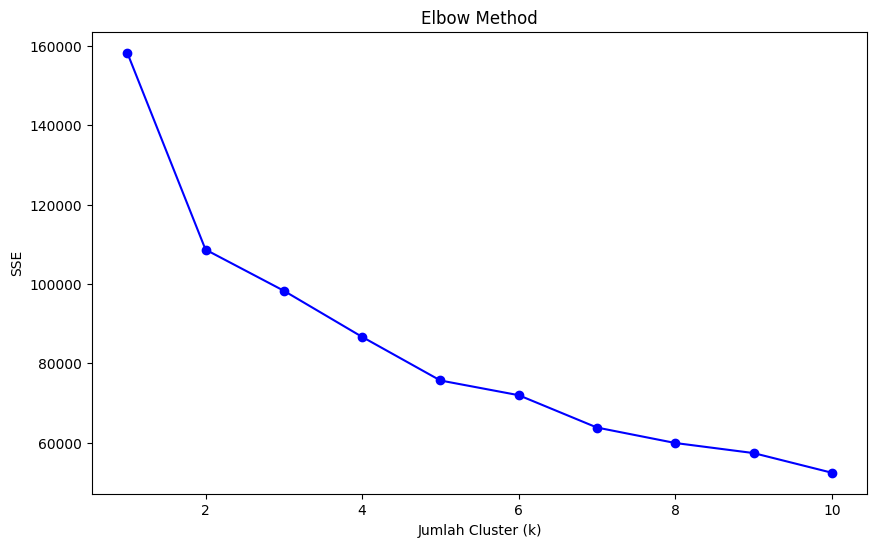

In [21]:
# Menghitung SSE untuk beberapa nilai k
sse = []
K = range(1, 11)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df_scaled)
    sse.append(kmeans.inertia_)

# Visualisasi Elbow Method
plt.figure(figsize=(10, 6))
plt.plot(K, sse, 'bo-')
plt.xlabel('Jumlah Cluster (k)')
plt.ylabel('SSE')
plt.title('Elbow Method')
plt.show()


Menghitung SSE(Elbow Method) berdasarkan hasil visuaslisasi dapat disimpulkan bahwa jumlah cluster optimal untuk dataset ini berada di sekitar 3 atau 4 cluster

# Silhouette score

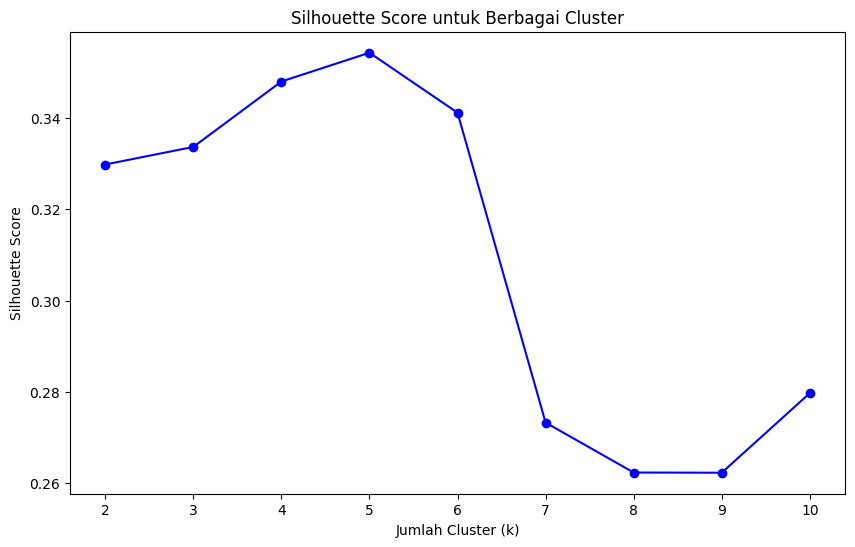

In [22]:
# Mencari silhouette score untuk beberapa nilai k
silhouette_scores = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df_scaled)
    score = silhouette_score(df_scaled, kmeans.labels_)
    silhouette_scores.append(score)

# Visualisasi Silhouette Score
plt.figure(figsize=(10, 6))
plt.plot(range(2, 11), silhouette_scores, 'bo-')
plt.xlabel('Jumlah Cluster (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score untuk Berbagai Cluster')
plt.show()


Menghitung Silhouette Score dapat disimpulkan bahwa cluster optimal berdasarkan Silhouette Score berada di sekitar 4 atau 5 cluster

# Menentukan jumlah k untuk analisis Elbow dan Silhouette

In [23]:
# Menggunakan k sesuai dengan hasil analisis Elbow dan Silhouette (misalnya 3)
k_optimal = 3
kmeans = KMeans(n_clusters=k_optimal, random_state=42)
df_scaled['Cluster'] = kmeans.fit_predict(df_scaled)

# Menampilkan cluster untuk setiap data
df_scaled.head()


,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,...,x14,x15,x16,x17,x18,x19,x20,x21,x22,Cluster
0,0.146578,-0.780502,-1.581769,-1.529944,1.168666,1.352327,0.597119,-1.287190,-1.672333,0.540390,...,0.796627,1.265956,-0.551081,-1.427291,-1.007678,0.483477,1.177905,1.023939,-0.595699,1
1,0.146578,-0.695439,-1.556680,-1.107634,1.300622,1.415359,0.363097,-1.909853,-1.876612,0.903961,...,0.406743,1.412903,-0.250524,-1.301412,-0.758490,0.171681,0.779239,0.565657,-0.474036,1
2,0.146578,-0.783334,-1.495953,-0.990973,0.915536,0.763498,0.058992,-2.079764,-1.940639,1.389091,...,0.590374,1.647536,0.345883,-1.009606,-0.369957,-0.208962,0.299030,0.777644,-0.084297,1
3,0.146578,-0.453678,-0.729537,-0.727096,1.505993,2.184868,0.098592,-1.667990,-1.264799,1.686808,...,0.181478,1.077586,-0.769643,-1.627648,-2.181026,-0.981638,-0.016165,-0.704780,-0.515365,1
4,0.146578,-1.078343,-1.440441,-0.867225,1.252998,1.255819,0.048313,-2.279164,-1.681117,1.655798,...,0.502823,1.710511,0.173262,-0.996517,-0.717936,-0.473426,0.232532,0.897212,-0.067430,1


Menentukan jumlah klaster yaitu misal 3 dan membuat label klaster untuk setiap data. Dan menampilkan tabel label cluster yang telah ditentukan untuk setiap data

# Visualisasi Clustering PCA

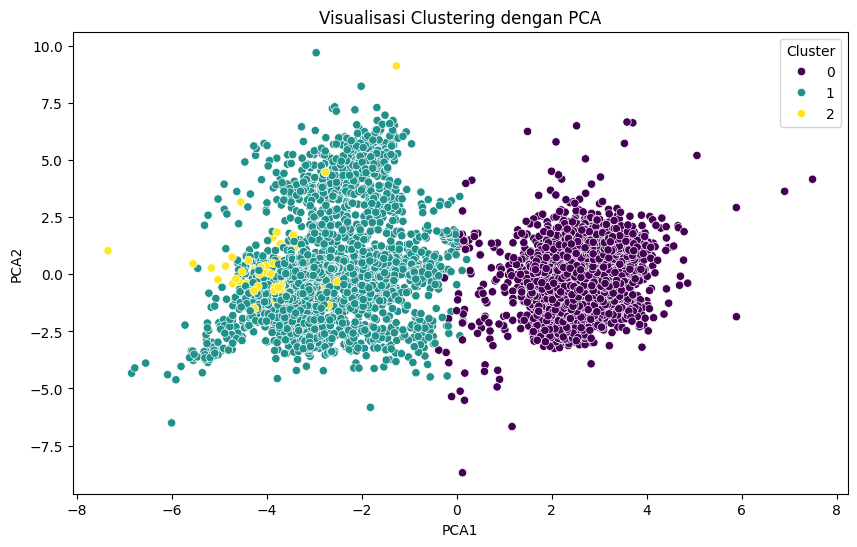

In [24]:
# Menggunakan PCA untuk mengurangi dimensi ke 2D
pca = PCA(n_components=2)
df_pca = pca.fit_transform(df_scaled.drop('Cluster', axis=1))

# Menyimpan hasil PCA dalam DataFrame
df_pca = pd.DataFrame(df_pca, columns=['PCA1', 'PCA2'])
df_pca['Cluster'] = df_scaled['Cluster']

# Visualisasi hasil clustering
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_pca, x='PCA1', y='PCA2', hue='Cluster', palette='viridis')
plt.title('Visualisasi Clustering dengan PCA')
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.legend(title='Cluster')
plt.show()


PCA (Principal Component Analysis) adalah Teknik untuk mereduksi dimensi data dengan tetap mempertahankan sebagian besar informasi. Menggunakan PCA untuk Reduksi Dimensi dan Data dikurangi ke 2 dimensi utama (PCA1 dan PCA2) untuk memudahkan visualisasi. Kemudian Menambahkan Label Cluster untuk PCA dalam bentuk 2D. Dapat disimpulkan bahwa bahwa K-Means berhasil mengelompokkan data berdasarkan pola yang ada karena perbedaan antar cluster terlihat jelas. Dan 3 klaster terlihat jelas seperti:

Cluster 0 (ungu) memiliki distribusi data yang padat di area tertentu.


Cluster 1 (hijau) tersebar di area yang lebih luas.


Cluster 2 (kuning) terlihat sebagai cluster kecil dengan distribusi yang lebih terfokus.

# Dendrogram Single Link

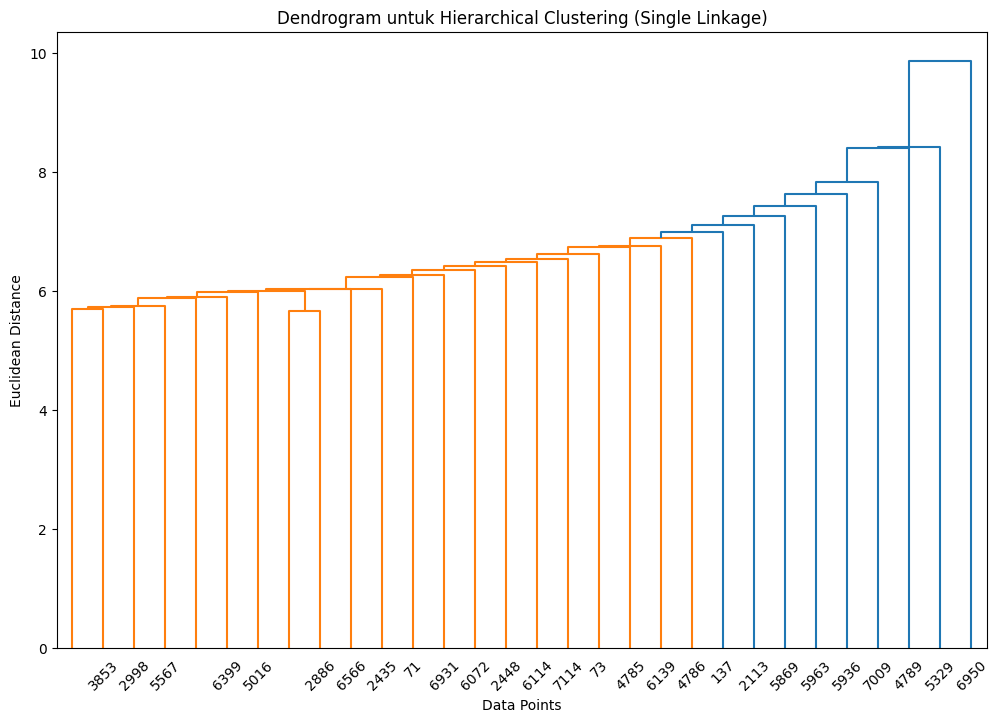

In [27]:
# Single Linkage
linked_single = linkage(df_scaled.drop('Cluster', axis=1), method='single')

plt.figure(figsize=(12, 8))
dendrogram(linked_single, truncate_mode='lastp', p=30, orientation='top', distance_sort='descending', show_leaf_counts=False)
plt.title('Dendrogram untuk Hierarchical Clustering (Single Linkage)')
plt.xlabel('Data Points')
plt.ylabel('Euclidean Distance')
plt.show()


Menampilkan dendrogram single link. Pakai p 30 untuk hanya percabangan terakhir yang ditampilkan, yang lebih mudah dipahami tanpa kehilangan konteks pembentukan cluster utama. Dapat disimpulkan bahwa cenderung menghasilkan cluster panjang yang kurang kompak

# Dendrogram Complete Link

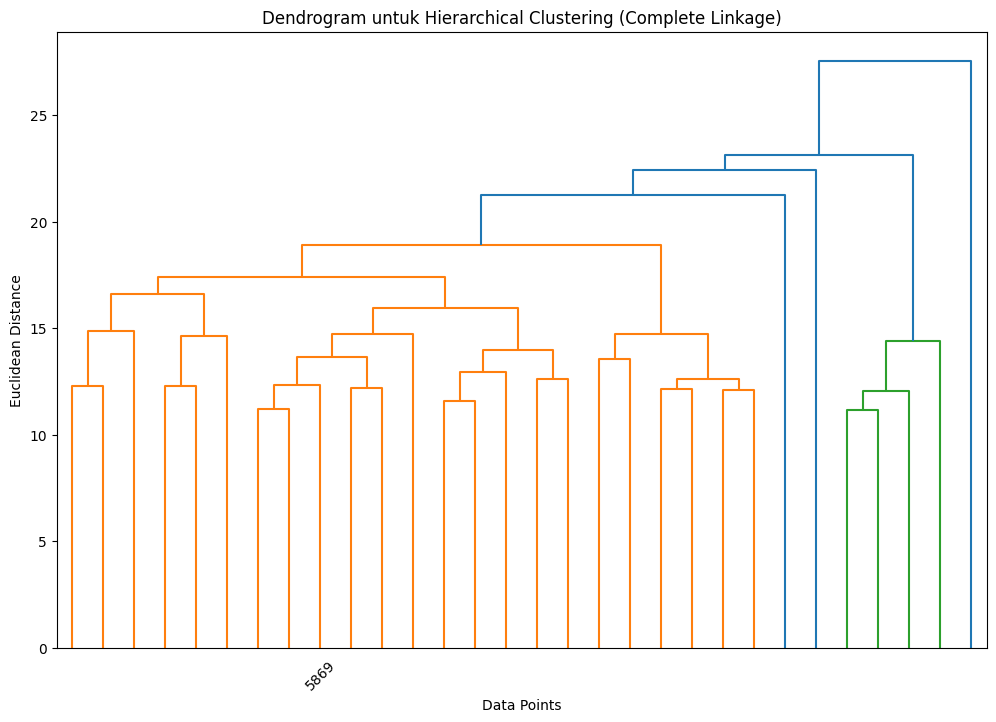

In [28]:
# Complete Linkage
linked_complete = linkage(df_scaled.drop('Cluster', axis=1), method='complete')

plt.figure(figsize=(12, 8))
dendrogram(linked_complete, truncate_mode='lastp', p=30, orientation='top', distance_sort='descending', show_leaf_counts=False)
plt.title('Dendrogram untuk Hierarchical Clustering (Complete Linkage)')
plt.xlabel('Data Points')
plt.ylabel('Euclidean Distance')
plt.show()

Menampilkan dendrogram complete link. Pakai p 30 untuk hanya percabangan terakhir yang ditampilkan, yang lebih mudah dipahami tanpa kehilangan konteks pembentukan cluster utama. Dapat disimpulkan bahwa menunjukkan cluster yang kompak. Dendrogram ini memotong pada ketinggian sekitar 20 memberikan pembagian 3 cluster, yang tampaknya memiliki jarak yang signifikan satu sama lain

# Dendrogram Average Link

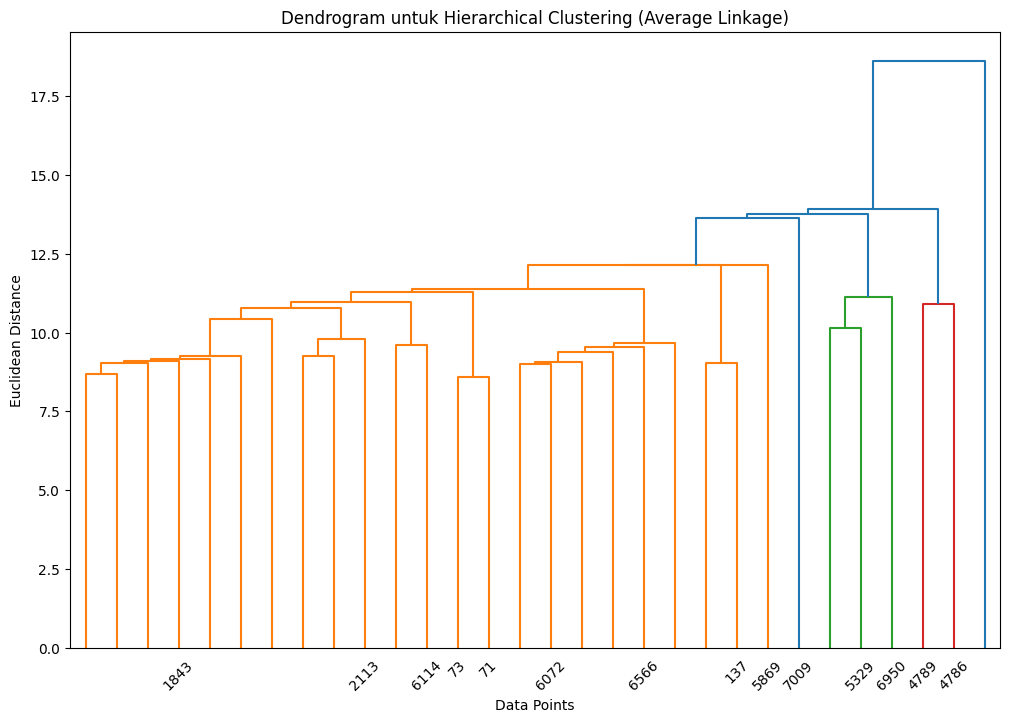

In [29]:
# Average Linkage
linked_average = linkage(df_scaled.drop('Cluster', axis=1), method='average')

plt.figure(figsize=(12, 8))
dendrogram(linked_average, truncate_mode='lastp', p=30, orientation='top', distance_sort='descending', show_leaf_counts=False)
plt.title('Dendrogram untuk Hierarchical Clustering (Average Linkage)')
plt.xlabel('Data Points')
plt.ylabel('Euclidean Distance')
plt.show()

Menampilkan dendrogram average link. Pakai p 30 untuk hanya percabangan terakhir yang ditampilkan, yang lebih mudah dipahami tanpa kehilangan konteks pembentukan cluster utama. Dapat disimpulkan bahwa memberikan cluster yang lebih seimbang dibandingkan metode Single atau Complete.

# Menggabungkan hasil clustering

In [30]:
# Menggabungkan hasil clustering dengan data asli
df['Cluster'] = df_scaled['Cluster']

# Melihat statistik untuk setiap cluster
df.groupby('Cluster').mean()


,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,...,x13,x14,x15,x16,x17,x18,x19,x20,x21,x22
Cluster,,,,,,,,,,,,,,,,,,,,,
0,0.997867,0.278530,0.215616,0.554794,0.189555,0.028228,-0.115218,0.046350,0.260050,0.033117,...,0.315668,-0.114981,-0.249492,0.092939,0.197399,0.009411,-0.100327,-0.118729,0.060288,0.188896
1,0.981187,0.346633,0.371569,0.313586,0.099404,0.191243,0.070610,-0.057547,0.034141,0.068095,...,-0.003617,0.013582,0.046489,0.009871,-0.028191,-0.007111,0.009463,0.016465,0.006056,-0.014857
2,0.988163,0.529133,0.661438,0.526813,-0.190751,-0.017479,0.414284,0.036707,-0.273036,0.157440,...,-0.071979,0.200417,0.025953,-0.143708,0.053293,0.105621,-0.065030,-0.026761,0.079165,0.005686


Menggabungkan hasil clustering ditambahkan ke dataset asli. Hasil tabel tersebut menunjukkan label cluster untuk setiap data berdasarkan hasil K-Means atau Hierarchical Clustering. Dapat disimpulkan bahwa Setiap cluster memiliki karakteristik unik berdasarkan nilai rata-rata fiturnya.

Cluster 0 Memiliki beberapa fitur dengan nilai rata-rata yang tinggi. Data dalam cluster ini cenderung memiliki pola unik dibandingkan cluster lain.

Cluster 1 memiliki Rata-rata fitur mendekati nol. Cluster ini memiliki data yang lebih seimbang dan seragam.

Cluster 2 memiliki beberapa fitur memiliki rata-rata yang lebih ekstrem (baik tinggi maupun rendah).
